In [1]:
import os
import pandas as pd
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# del make_splits
%run '../code/constants.py'
%run '../code/PyWoE.py'
%run '../code/feature_selection.py'
%run '../code/preprocessing.py'

In [3]:
fs = pd.read_pickle(path + mod_fs)
fs['abs'] = np.abs(fs.coefficients)
fs = fs.sort_values('abs', ascending=False)
fs

column  coefficients  \
0                        decision_engine.score.points      0.198703   
8   third_party.clarity_cbb.clear-bank-behavior.cb...     -0.119144   
6   third_party.clarity_cbb.clear-bank-behavior.ac...      0.079798   
4   third_party.clarity_cbb.clear-bank-behavior.ac...     -0.053445   
15  third_party.clarity_cbb.clear-bank-behavior.fi...      0.050963   
14  third_party.clarity_cbb.clear-bank-behavior.fi...      0.037506   
2   extra_variables.prev_handsets_decision_cart_limit     -0.036359   
12  third_party.clarity_cbb.clear-bank-behavior.fi...     -0.032553   
16  third_party.clarity_cbb.clear-bank-behavior.fi...      0.030199   
10  third_party.clarity_cbb.clear-bank-behavior.fi...      0.025655   
1   extra_variables.geocode_location_to_user_dista...      0.024878   
17  third_party.clarity_cbb.clear-bank-behavior.fi...     -0.023200   
20  pmml_variables.fe_loan_application_address_sta...     -0.017361   
7   third_party.clarity_cbb.clear-bank-behavior.ac...      0.017235   
5   third_party.clarity_cbb.clear-bank-behavior.ac...      0.014014   
9   third_party.clarity_cbb.clear-bank-behavior.fi...      0.012082   
19  third_party.clarity_cbb.clear-bank-behavior.nu...      0.011796   
3   third_party.clarity_cbb.clear-bank-behavior.ac...     -0.007450   
11  third_party.clarity_cbb.clear-bank-behavior.fi...      0.007251   
18  third_party.clarity_cbb.clear-bank-behavior.fi...      0.006695   
13  third_party.clarity_cbb.clear-bank-behavior.fi...      0.000853   

                                       name       abs  
0                                    points  0.198703  
8                                 cbb-score  0.119144  
6                         high-risk-factors  0.079798  
4          days-since-first-seen-by-clarity  0.053445  
15                             one-year-ago  0.050963  
14                          three-years-ago  0.037506  
2         prev_handsets_decision_cart_limit  0.036359  
12                       debit-bureau-score  0.032553  
16                          ninety-days-ago  0.030199  
10                            two-years-ago  0.025655  
1   geocode_location_to_user_distance_miles  0.024878  
17                            two-years-ago  0.023200  
20     fe_loan_application_address_state_TX  0.017361  
7                            number-of-ssns  0.017235  
5                  default-rate-60-days-ago  0.014014  
9                            five-years-ago  0.012082  
19          number-of-unknown-risk-accounts  0.011796  
3                      twentyfour-hours-ago  0.007450  
11                          thirty-days-ago  0.007251  
18                           sixty-days-ago  0.006695  
13                             one-year-ago  0.000853

In [4]:
extra = model_extra_vars
cols = list(set(list(fs['column']) + extra + ['y']))
print (cols)

['third_party.clarity_cbb.clear-bank-behavior.fis-chex-advisor.number-closures-unpaid.three-years-ago', 'third_party.clarity_cbb.clear-bank-behavior.accounts.account.default-rate-60-days-ago', 'y', 'extra_variables.geocode_location_to_user_distance_miles', 'third_party.clarity_cbb.clear-bank-behavior.account-stability.twentyfour-hours-ago', 'third_party.clarity_cbb.clear-bank-behavior.fis-chex-advisor.number-closures.one-year-ago', 'third_party.clarity_cbb.clear-bank-behavior.fis-chex-advisor.number-of-non-dda-inquiries.two-years-ago', 'third_party.clarity_cbb.clear-bank-behavior.number-of-unknown-risk-accounts', 'decision_engine.score.points', 'third_party.clarity_cbb.clear-bank-behavior.cbb-score', 'third_party.clarity_cbb.clear-bank-behavior.fis-chex-advisor.number-of-inquiries.ninety-days-ago', 'third_party.clarity_cbb.clear-bank-behavior.fis-chex-advisor.amount-closures.thirty-days-ago', 'third_party.clarity_cbb.clear-bank-behavior.fis-chex-advisor.number-of-payday-inquiries.sixty

In [15]:
df = pd.read_pickle(path + mod_fname)[cols]

In [16]:
df.shape

(28263, 24)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
X, y = get_x_y(impute_df(df.copy(), strategy='most_frequent'))

In [9]:
lr = LogisticRegression(C=9999)
shuffle = StratifiedShuffleSplit(n_splits=20)
cv = cross_validate(lr, X, y, scoring=mod_auc_scorer, return_train_score=True, cv=shuffle)

In [10]:
print (cv['train_score'], 'mean', np.mean(cv['train_score']))

print (cv['test_score'], 'mean', np.mean(cv['test_score']))

[0.19068259 0.19495453 0.19345071 0.18817208 0.19450347 0.19342582
 0.19480441 0.19722193 0.19295354 0.19580096 0.19776227 0.20067931
 0.19302322 0.19572814 0.1942899  0.19504803 0.19546682 0.19230847
 0.19548503 0.19069227] mean 0.1943226752822855
[0.2425332  0.1796278  0.1794871  0.26710673 0.1909467  0.18431736
 0.16654763 0.15411187 0.20712567 0.16533665 0.15612    0.1436457
 0.22984698 0.16393233 0.18417958 0.15009814 0.17372877 0.19633681
 0.16557404 0.21101548] mean 0.18558092767514434


In [88]:
# configs = {
#     'col': 'pmml_variables.fe_days_since_location_created'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': np.nan
# } # no binning

# configs = {
#     'col': 'third_party.clarity_cbb.clear-bank-behavior.number-of-high-risk-accounts'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': True
#     , 'direction': 0
# } #No binning

# configs = {
#     'col': 'extra_variables.prev_handsets_decision_cart_limit'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': 1
# } # no binning

# configs = {
#     'col': 'third_party.clarity_cbb.clear-bank-behavior.fis-chex-advisor.number-closures-unpaid.three-years-ago'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': 0
# } # no binning

# configs = {
#     'col': 'third_party.clarity_cbb.clear-bank-behavior.cbb-score'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': 0
# } #Yes binning

# configs = {
#     'col': 'pmml_variables.fe_age_in_years'
#     , 'bins': [2, 3]
#     , 'mono': True
#     , 'direction': 1
# } # Yes binning

configs = {
    'col': 'extra_variables.geocode_location_to_user_distance_miles'
    , 'bins': [2, 3, 4, 5, 6]
    , 'mono': False
    , 'direction': 0
} # No binning

# configs = {
#     'col': 'third_party.clarity_cbb.clear-bank-behavior.accounts.account.default-rate-61-365-days-ago'
#     , 'bins': [3, 4, 5]
#     , 'mono': False
#     , 'direction': 0
# } # no binning

# configs = {
#     'col': 'third_party.clarity_cbb.clear-bank-behavior.accounts.account.default-rate-ratio'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': 0
# } # no binning

# configs = {
#     'col': 'third_party.clarity_cbb.clear-bank-behavior.number-of-low-risk-accounts'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': 0
# } # no binning

# configs = {
#     'col': 'third_party.clarity_cbb.clear-bank-behavior.estimated-bank-history'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': 0
# } # no binning

# configs = {
#     'col': 'third_party.clarity_cbb.clear-bank-behavior.fis-chex-advisor.number-closures.one-year-ago'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': 0
# } # no binning

# configs = {
#     'col': 'pmml_variables.fe_address_summary_addr_dpd30_bad_count'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': 0
# } # no binning

# configs = {
#     'col': 'third_party.clarity_cbb.clear-bank-behavior.check-cashing.average-amount-of-checks-attempted.thirty-days-ago'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': 0
# } # no binning

# configs = {
#     'col': 'third_party.clarity_cbb.clear-bank-behavior.check-cashing.average-amount-of-checks-attempted.thirty-days-ago'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': 0
# } # no

# configs = {
#     'col': 'extra_variables.clarity_cbb_score2'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': 0
# } #no binning

# configs = {
#     'col': 'third_party.clarity_cbb.clear-bank-behavior.accounts.account.days-since-first-seen-by-clarity'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': 0
# } #no binning

# configs = {
#     'col': 'third_party.clarity_cbb.clear-bank-behavior.fis-chex-advisor.number-days-since-most-recent-closure-5-years-ago'
#     , 'bins': [2, 3, 4, 5, 6, 7, 8]
#     , 'mono': False
#     , 'direction': 0
# } #no binning


In [89]:
col = configs['col']
col_orig = df[col].copy().astype(np.float64)

In [90]:
df[col].describe()

count    28248.000000
mean        16.961095
std        101.398815
min          0.000000
25%          0.000000
50%          0.000000
75%          9.000000
max       3453.000000
Name: extra_variables.geocode_location_to_user_distance_miles, dtype: float64

In [91]:
models = []
X2 = X.drop(col, axis=1)
for num in configs['bins']:
    amod = {}
    amod['num'] = num
    col_trans, amod['woe'] = bin_feature(col_orig, y, qnt_num=num
                                         , mono=configs['mono'], direction=configs['direction'])
    X2['trans'] = col_trans.values
    cv = cross_validate(lr, X2, y, scoring=mod_auc_scorer, return_train_score=True, cv=shuffle)
    amod['mean_train'] = np.mean(cv['train_score'])
    amod['mean_test'] = np.mean(cv['test_score'])
    amod['cv'] = cv
    models.append(amod)
    print (num)

2
3
4
5
6


In [92]:
m_s = [(e, d['num'], d['mean_train'], d['mean_test']) for e, d in enumerate(models)]
max_buckets = sorted(m_s, key=lambda v: v[3], reverse=True)[0][1]
m_s

[(0, 2, 0.19338322044821815, 0.19075856043590037),
 (1, 3, 0.19256362503026062, 0.1923355964177805),
 (2, 4, 0.19123478978683475, 0.19395363768194976),
 (3, 5, 0.1931955451140301, 0.18524947867628366),
 (4, 6, 0.19268386170564258, 0.1896247579160056)]

In [93]:
print (max_buckets)
# max_buckets=1

4


In [94]:
col_trans, woe = bin_feature(col_orig, y, qnt_num=max_buckets
                             , mono=configs['mono'], direction=configs['direction'])
sorted(col_trans.unique())

[-0.09623733015211422,
 0.0033595911535728717,
 0.030339419620191377,
 0.11818091531562813]

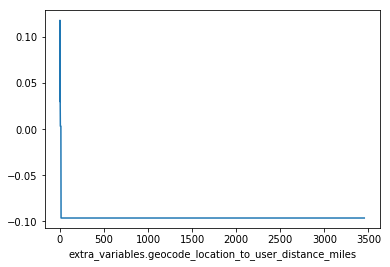

In [95]:
col_trans2 = col_trans.copy()
col_trans2.index = col_orig.fillna(0)
col_trans2.sort_index().plot(kind='line')

Try the optimize functionality

In [96]:
optimized = woe.optimize()
new_col = optimized.transform(col_orig)['woe']

In [97]:
new_col.value_counts()

 0.005724    27891
-0.406100      357
 0.118181       15
Name: woe, dtype: int64

In [103]:
X2['trans'] = new_col.values
cv = cross_validate(lr, X2, y, scoring=mod_auc_scorer, return_train_score=True, cv=shuffle)

In [104]:
print (np.mean(cv['train_score']))
print (np.mean(cv['test_score']))

0.19100592046166695
0.19410910458182096


Decide to use 'optimized' woe or grid searched

In [105]:
use = new_col # col_trans or new_col

In [106]:
use.index = col_orig.values
df_bin = make_splits(use)
df_bin['var'] = col
df_bin

minimum  maximum     value  \
0      0.0    234.0  0.005724   
1    235.0   3453.0 -0.406100   
2   -999.0   -999.0  0.118181   

                                                 var  
0  extra_variables.geocode_location_to_user_dista...  
1  extra_variables.geocode_location_to_user_dista...  
2  extra_variables.geocode_location_to_user_dista...

In [107]:
header = True
if os.path.isfile(bin_fp):
    header = False
df_bin.to_csv(bin_fp, index=False, mode='a', header=header)

Finished!